/tmp/ipykernel_8963/746920448.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


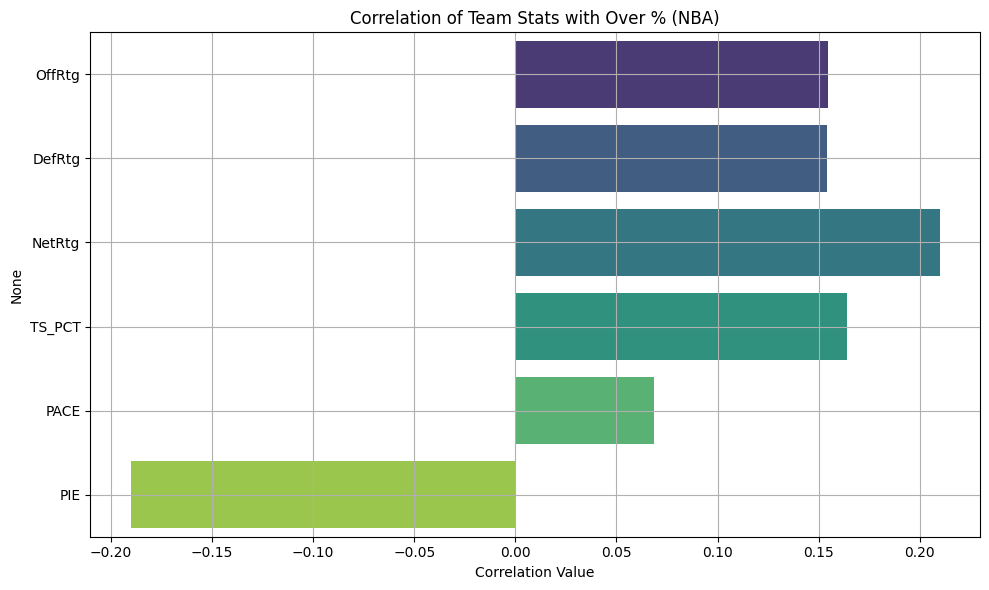

OffRtg    0.154383
DefRtg    0.153950
NetRtg    0.209780
TS_PCT    0.164165
PACE      0.068337
PIE      -0.190312
Name: Over_PCT, dtype: float64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the team advanced stats
team_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'
team_df = pd.read_csv(team_stats_path)
team_df['Year'] = team_df['Year'].astype(int)
team_df['POSS'] = team_df['POSS'].astype(str).str.replace(',', '').astype(float)

# Aggregate by year to get league averages
team_avg = team_df.groupby('Year').mean(numeric_only=True).reset_index()

# Load over/under odds data
ou_data_path = '/workspaces/Data-Science-Final-Project/NBA/data/over_under_line_oddh_all.csv'
ou_df = pd.read_csv(ou_data_path)

# Clean percentage columns
ou_df['Over_PCT'] = ou_df['Over_PCT'].astype(str).str.replace('%', '').astype(float) / 100
ou_df['Average_Score'] = pd.to_numeric(ou_df['Average_Score'], errors='coerce')

# Assign YEAR manually since file lacks explicit dates, assume starts in 2003
ou_df['Year'] = list(range(2003, 2003 + len(ou_df)))

# Merge over/under data with team stats
merged_df = pd.merge(team_avg, ou_df, left_on='Year', right_on='Year', how='inner')

# Select relevant columns for correlation with Over_PCT
stats_to_test = ['OffRtg', 'DefRtg', 'NetRtg', 'TS_PCT', 'PACE', 'PIE']
correlations = merged_df[stats_to_test + ['Over_PCT']].corr()['Over_PCT'].drop('Over_PCT')

# Plot correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title('Correlation of Team Stats with Over % (NBA)')
plt.xlabel('Correlation Value')
plt.grid(True)
plt.tight_layout()
plt.show()

correlations
